# ANÁLISIS POPULARIDAD DE LOS SHOW

### Autor:Pedro Jofre
### Curso:Data Science II: Machine Learning para la Ciencia de Datos
### comision: 61190
#### source:https://www.kaggle.com/datasets/asaniczka/full-tmdb-tv-shows-dataset-2023-150k-shows?resource=download.

## Objetivos
Obtener datos de diversas fuentes públicas para luego analizarlos mediante el lenguaje Python con el fin de contestar preguntas de interés para una industria, negocio o proyecto personal. Se deberán utilizar datasets complejos implementando técnicas avanzadas para la limpieza y adquisición de datos
<br>
Contar una historia que ponga el contexto la solución que se aplicará.

Estructurar el contexto en función de múltiples pero simples preguntas/hipótesis a responder
Importar datos crudos usando herramientas de Python
Limpiar y transformar los datos para permitir un posterior análisis
Generar el Análisis exploratorio de Datos (EDA).
Generar el Análisis estadístico de Datos ( Univariado, Bivariado y Multivariado*)


## Contexto
### The Movie Database

El conjunto de datos proporciona información crucial para analizar las tendencias y predecir el éxito de películas y shows de televisión utilizando información de The Movie Database (TMDB). La base de datos esta compuesta por 29 variables y mas de 150000 registros, los cuales incluyen atributos interesantes de analisis como el genero, popularidad y fecha de emision, permitiendo la segmentación y análisis detallado. Esta cantidad de datos permite una comprensión profunda y detallada de las preferencias y comportamientos de la audiencia.

Los análisis derivados de este dataset presentan una oportunidad valiosa para la industria del entretenimiento, permitiendo la identificación de factores que impulsan la popularidad, la evaluación de la efectividad de estrategias de lanzamiento y marketing, y la formulación de recomendaciones personalizadas para los usuarios, por mencionar algunos.

Este conjunto de datos es una herramienta invaluable para investigadores y profesionales de la industria del entretenimiento, contribuyendo a la mejora de la toma de decisiones estratégicas, la personalización de la experiencia del usuario y el incremento de la satisfacción y retención de la audiencia. 

### Hipotesis

En primer lugar, se espera analizar cómo ha evolucionado la cantidad de programas a lo largo de los años. Se anticipa encontrar un aumento constante en la cantidad de estrenos debido al avance tecnológico y la expansión del acceso a plataformas de distribución de contenido. Además, se espera observar un cambio notable en el período de la pandemia de COVID-19, ya que este evento probablemente generó un efecto significativo en el comportamiento de las personas, afectando tanto la producción como el consumo de entretenimiento. Ademas de analizar como varia segun la estacion del año en que se estrena.
Por ultimo se espera encontrar cuales son las variables con mayor relacion al momento de determinar la popularidad de un programa.

#### preguntas
Existe un aumento en la cantidad de show emitidos? <br>
En que estacion se tiene mayor estreno/finalizacion de show?<br>
Que variables tienen una influencia en la popularidad? <br>
existe una relacion entre los generos y la estacion ?<br>
Que generos son los mas populares? <br>
El idioma del show tiene efecto en la popularidad?

## Hipotesis: 
En primer lugar, se espera analizar cómo ha evolucionado la cantidad de programas a lo largo de los años. Se anticipa encontrar un aumento constante en la cantidad de estrenos debido al avance tecnológico y la expansión del acceso a plataformas de distribución de contenido. Además, se espera observar un cambio notable en el período de la pandemia de COVID-19, ya que este evento probablemente generó un efecto significativo en el comportamiento de las personas, afectando tanto la producción como el consumo de entretenimiento. Ademas de analizar como varia segun la estacion del año en que se estrena.
Por ultimo se espera encontrar cuales son las variables con mayor relacion al momento de determinar la popularidad de un programa.

En primer lugar se carga las librerias necesarias y la base previamente descargada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, AutoDateLocator,AutoDateFormatter,YearLocator
import seaborn as sns
from wordcloud import WordCloud


In [2]:
table= pd.read_csv('TMDB_tv_dataset_v3.csv')
table.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [3]:
table.shape

(168639, 29)

In [4]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

A continuacion revisamos los faltantes de la base

<Axes: >

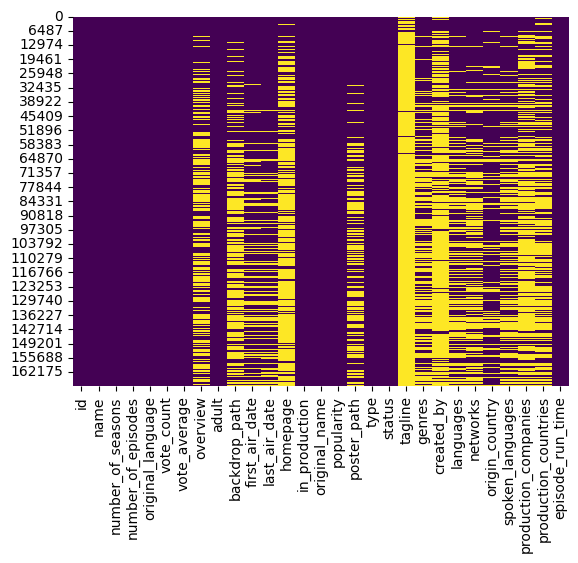

In [5]:
sns.heatmap(table.isnull(),cmap='viridis',cbar=False)

In [6]:
(table.isnull().sum()).sum()

1190189

Como se puede observar los datos poseen una gran cantidad de datos faltantes. Por lo que en primer lugar se una limpieza de datos, a continuacion se dara un resumen de los puntos mas importantes, se puede observar todos los pasos tomados en la transformacion en el notebook "data_wrapping Jofre.ipynb".<br> Para facilitar la visualizacion de la data es necesario renombrar las variables a traves de la funcion rename. 

In [7]:
nombres_columnas= {'id':"id",
'name':"Nombre_Serie",
'number_of_seasons':"#_Temporadas",
'number_of_episodes':"#_Episodios",
'original_language':"Idioma_original",
'vote_count':"Votos_Totales",
'vote_average':"Voto_promedio",
'overview':"Resumen",
'adult':"Categoria_Adulto",
'backdrop_path':"url_Imagen",
'first_air_date':"Fecha_Inicio",
'last_air_date':"Fecha_Fin",
'homepage':"Pagina",
'in_production':"En_Produccion",
'original_name':"Nombre_Original",
'popularity':"Popularidad",
'poster_path':"url_Poster",
'type':"Tipo_Show",
'status':"Status",
'tagline':"Frase",
'genres':"Generos",
'created_by':"Creador",
'languages':"Idiomas",
'networks':"Canales",
'origin_country':"Pais_Origen",
'spoken_languages':"Idiomas_hablados",
'production_companies':"Companias_Produccion",
'production_countries':"Paises_Produccion",
'episode_run_time':"Duracion_episodio"}

table.rename(columns=nombres_columnas,inplace=True)

- En primer lugar se eliminaran los 5 registros que no poseen nombre, ya que corresponden a un porcentaje menor del 0.01% 
- Se eliminan los campos que no entregan mayor informacion relevante para el analisis propuesto como:Resumen,url_Imagen,Pagina,url_Poster,Frase
- Se elimina las filas que no poseen fecha de inicio o fin 
- Se rellena la informacion faltante en los campos 'Generos','Creador','Idiomas','Canales','Pais_Origen','Idiomas_hablados','Companias_Produccion','Paises_Produccion' como 'sin informacion'

In [8]:
table=table.dropna(subset=['Nombre_Serie'])
table=table.drop(columns=['Resumen','url_Imagen','url_Poster','Frase','Pagina'])
table=table.dropna(subset=['Fecha_Inicio','Fecha_Fin' ])
columnas= ['Generos','Creador','Idiomas','Canales','Pais_Origen','Idiomas_hablados','Companias_Produccion','Paises_Produccion']
for c in columnas:
    table[c]=table[c].fillna('sin informacion')

In [9]:
table.shape

(135806, 24)

Se puede observar que luego de los cambios se mantiene sobre un 80% de los datos originales

A continuacion se realiza el proceso de enriquecimiento, donde generaremos nuevos campos a partir de la informacion recolectada para la calidad de nuestra base, al igual que el tratamiento de nulos si quiere revisar en detalles todos los pasos los puede observar en el notebook "data_wrapping Jofre.ipynb". Para dar un resumen los procesos realizados fueron los siguientes:<br>
1- para cada columna que consiste en un array de string se crea un nuevo campo que muestre cuantos datos existen en la columna, como por ejemplo generos.<br>
2- se crea nuevas columnas relacionada a la fecha, como año, mes y estacion.<br>
3- Se crean bases de datos auxiliares de los campos trabajados en el punto 1 utilizando el id del show como llave foreana. <br>
4- se eliminan las columnas del punto 1 y se guarda la nueva base base transformada.

Los pasos anteriores dan como resultados una base de datos con esquema de estrella, con la tabla de hechos siendo "TMDB_procesado.csv" y 8 tablas de dimensiones, las cuales muestran informacion adicional para cada show.

In [10]:
tmdb=pd.read_csv('TMDB_procesado.csv')
tmdb.head()

,Nombre_Serie,#_Temporadas,#_Episodios,Votos_Totales,Voto_promedio,Categoria_Adulto,Fecha_Inicio,Fecha_Fin,En_Produccion,Nombre_Original,...,num_Companias_Produccion,num_Paises_Produccion,Mes_I,estacion_I,estacion_I_n,anho_I,Mes_F,estacion_F,estacion_F_n,anho_F
0,Game of Thrones,8,73,21857,8.442,False,2011-04-17,2019-05-19,False,Game of Thrones,...,4,2,4,0,primavera,2011,5,1,verano,2019
1,Money Heist,3,41,17836,8.257,False,2017-05-02,2021-12-03,False,La Casa de Papel,...,1,1,5,1,verano,2017,12,0,primavera,2021
2,Stranger Things,4,34,16161,8.624,False,2016-07-15,2022-07-01,True,Stranger Things,...,2,1,7,3,invierno,2016,7,3,invierno,2022
3,The Walking Dead,11,177,15432,8.121,False,2010-10-31,2022-11-20,False,The Walking Dead,...,6,1,10,2,otoño,2010,11,3,invierno,2022
4,Lucifer,6,93,13870,8.486,False,2016-01-25,2021-09-10,False,Lucifer,...,4,1,1,1,verano,2016,9,1,verano,2021


Una vez que se ha limpiado y enriquecido la base, es necesario estudiar en mas detalle las variables a trabajar, en primer lugar se estudiara las variables categoricas.

C:\Users\Pedro\AppData\Local\Temp\ipykernel_23048\2659127758.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_23048\2659127758.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_23048\2659127758.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_23048\2659127758.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.

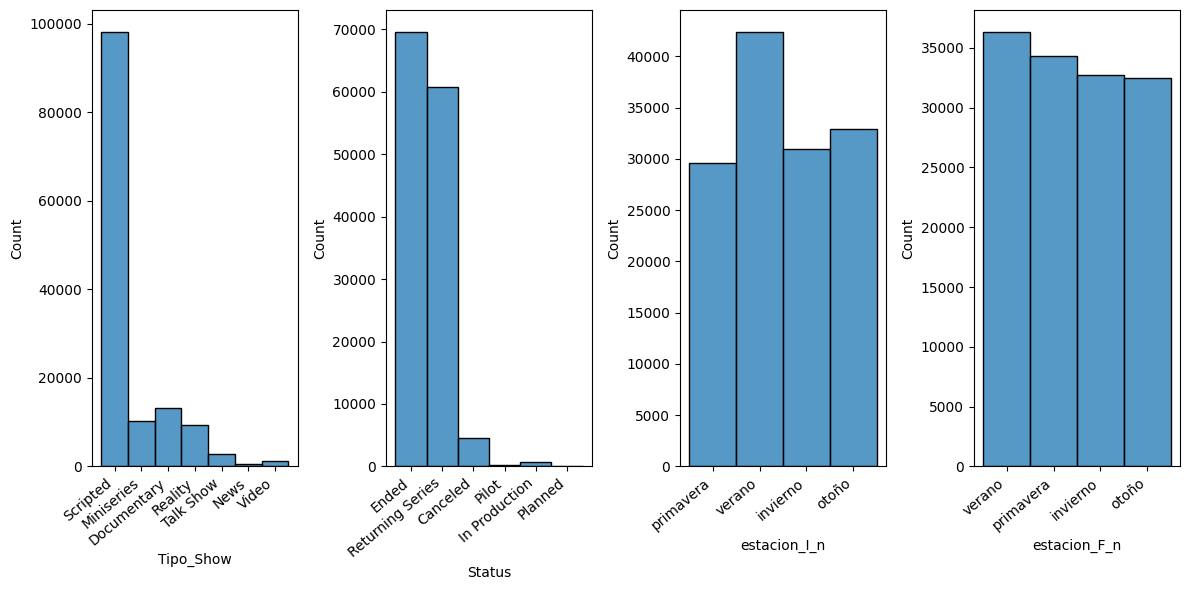

In [11]:
fig, axis = plt.subplots(1, 4, figsize = (12, 6))

# Crear un histograma múltiple
ax1=sns.histplot(ax = axis[ 0], data = tmdb, x = "Tipo_Show")
ax2=sns.histplot(ax = axis[1], data = tmdb, x = "Status")
ax3=sns.histplot(ax = axis[ 2], data = tmdb, x = "estacion_I_n")
ax4=sns.histplot(ax = axis[3], data = tmdb, x = "estacion_F_n")

# Ajustar el layout
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

# Mostrar el plot
plt.show()


tipo show: Se puede observar que existe una diferencia entre la cantidad e show scripted y el resto<br>
Status: en este caso los valores estan desvalanceados hacia los Ended y Returning series <br>
Estaciones de inicio: se observa que en verano se tiene un mayor porcentaje de show en estreno, lo cual puede estar relacionado a que esta epoca corresponde a cuando la mayor parte de la poblacion esta en vacaciones por lo que los estudios aprobechan de estrenar nuevos show al tener mayor publico<br>
Estacion de Fin: A diferencia de la estacion de inicio aca no se observa una mayor diferencia entre la cantidad de show terminados por fecha.  

Se crean nuevas columnas boleanas para indicar si el show es scripted, si esta en estado terminado o esta en estado de restreno.  

In [12]:
tmdb['scripted']=tmdb['Tipo_Show'].apply(lambda x: 1 if x=='Scripted' else 0)
tmdb['Terminado']=tmdb['Status'].apply(lambda x: 1 if x=='Ended' else 0)
tmdb['Serie reestrenada']=tmdb['Status'].apply(lambda x: 1 if x=='Returning Series' else 0)

In [13]:
tmdb['Terminado'].value_counts()
tmdb['Serie reestrenada'].value_counts()

Serie reestrenada
0    75114
1    60692
Name: count, dtype: int64

In [14]:
tmdb_corr=tmdb.drop(columns=["Nombre_Serie","Fecha_Inicio","Fecha_Fin","Nombre_Original","estacion_I_n","estacion_F_n","Tipo_Show","Status","Pais_Origen"])
tmdb_corr.corr()

,#_Temporadas,#_Episodios,Votos_Totales,Voto_promedio,Categoria_Adulto,En_Produccion,Popularidad,Duracion_episodio,num_Generos,num_Idioma_original,...,num_Paises_Produccion,Mes_I,estacion_I,anho_I,Mes_F,estacion_F,anho_F,scripted,Terminado,Serie reestrenada
#_Temporadas,1.000000,0.412525,0.062667,0.119237,-0.024301,0.069773,0.185672,0.054484,0.059834,NaN,...,0.055861,-0.000002,-0.005535,-0.148751,0.017122,-0.012423,0.042809,-0.072262,-0.077111,0.067532
#_Episodios,0.412525,1.000000,0.033175,0.076141,-0.020801,0.000474,0.339565,0.028152,0.067845,NaN,...,0.051748,0.002441,-0.004559,-0.091749,0.012901,0.000186,0.008792,-0.000792,-0.003709,0.000717
Votos_Totales,0.062667,0.033175,1.000000,0.107980,-0.008691,-0.033394,0.214690,0.016627,0.108734,NaN,...,0.059903,0.006809,0.000650,0.006255,0.000249,0.000500,0.024080,0.025949,0.021391,-0.032323
Voto_promedio,0.119237,0.076141,0.107980,1.000000,0.014228,-0.219298,0.117073,0.152678,0.390566,NaN,...,0.245851,0.013445,0.009247,-0.017840,0.015186,-0.003519,0.019251,-0.044127,0.198510,-0.210752
Categoria_Adulto,-0.024301,-0.020801,-0.008691,0.014228,1.000000,-0.044554,-0.018270,-0.028951,-0.027258,NaN,...,0.020525,0.009957,0.000528,0.006525,0.003887,0.004450,0.002089,-0.034571,0.051587,-0.044956
En_Produccion,0.069773,0.000474,-0.033394,-0.219298,-0.044554,1.000000,-0.014663,-0.181267,-0.265174,NaN,...,-0.179185,-0.004169,0.007615,0.348897,-0.002016,0.016302,0.371747,0.051029,-0.935063,0.985296
Popularidad,0.185672,0.339565,0.214690,0.117073,-0.018270,-0.014663,1.000000,0.025037,0.112772,NaN,...,0.054617,0.010305,-0.001163,-0.047771,0.015508,0.000952,0.000474,0.014704,0.008832,-0.013371
Duracion_episodio,0.054484,0.028152,0.016627,0.152678,-0.028951,-0.181267,0.025037,1.000000,0.130579,NaN,...,0.104835,0.002098,0.002545,-0.074778,0.001569,0.001505,-0.060665,-0.082403,0.174300,-0.180565
num_Generos,0.059834,0.067845,0.108734,0.390566,-0.027258,-0.265174,0.112772,0.130579,1.000000,NaN,...,0.393351,0.009643,-0.000694,-0.023569,0.018922,-0.001052,-0.002052,-0.054155,0.239446,-0.266087
num_Idioma_original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tmdb_corr['num_Idioma_original'].value_counts()

num_Idioma_original
1    135806
Name: count, dtype: int64

Se observa que la correlacion para idioma original es NaN que al hacer el conteo de valores se observa que cada show tiene solo un idioma original, por lo que esta columna no entregara mayor informacion por lo uqe sera eliminada. 

In [16]:
tmdb=tmdb.drop(columns='num_Idioma_original')

In [17]:
tmdb_corr['Categoria_Adulto']=tmdb_corr['Categoria_Adulto'].astype(int)
tmdb_corr['En_Produccion']=tmdb_corr['En_Produccion'].astype(int)

<Axes: >

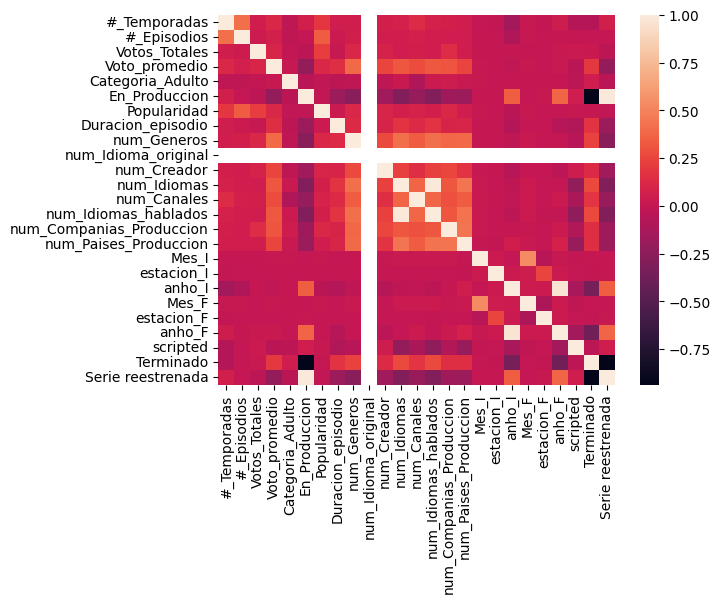

In [18]:
sns.heatmap(tmdb_corr.corr())

Del heatmap se puede observar lo siguiente: <br>
Existe una correlacion fuerte entre idiomas e idiomas hablados.<br>
Existe una gran relacion entre serie reestrenada y en produccion, esto es normal ya que si se esta restrenando, la serie debe estar produciendose. <br>
Se observa ademas (para ambos puntos anteriores) que las variables tienen el mismo comportamiento con el resto, por lo que se puede dejar solo 1 de esta sin perder informacion.<br>
Existe una relacion fuerte negativa entre una serie terminada y en reestreno, lo que hace sentido ya que no es posible que una serie existe en ambos estado al mismo tiempo.<br>


In [19]:
genero=pd.read_csv('Generos.csv')
genero.head()
pais=pd.read_csv('Paises_Produccion.csv')
pais.head()

,id_show,Paises_Produccion
0,1399.0,United Kingdom
1,1399.0,United States of America
2,71446.0,Spain
3,66732.0,United States of America
4,1402.0,United States of America


In [20]:
genero['Generos'].value_counts()

Generos
sin informacion        44210
Drama                  22329
Documentary            19016
Comedy                 14249
Animation               8967
Reality                 8940
 Drama                  8938
 Comedy                 7384
 Sci-Fi & Fantasy       4409
 Family                 3801
 Action & Adventure     3623
 Crime                  3321
 Mystery                3295
Crime                   3202
Action & Adventure      3172
Family                  2431
 Kids                   2413
Talk                    2253
 Animation              2065
 Reality                1686
Mystery                 1645
Sci-Fi & Fantasy        1511
Kids                    1465
 Documentary            1368
 War & Politics         1255
Soap                    1144
 Talk                    862
 Soap                    845
News                     595
War & Politics           422
 News                    346
Western                  213
 Romance                 174
 Western                 100
 Histo

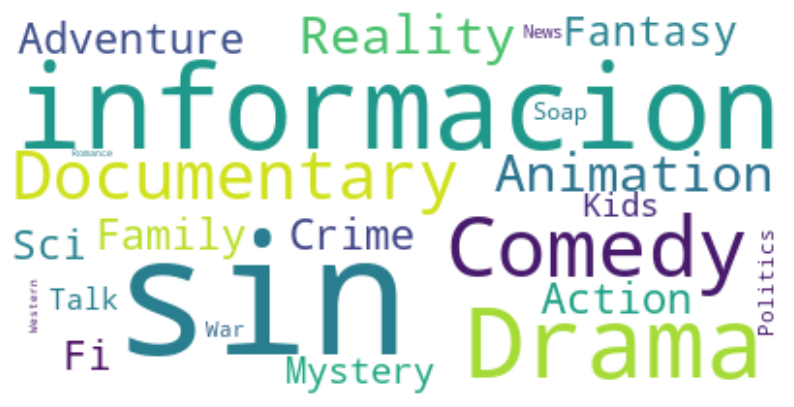

In [21]:
text1=" ".join(gen for gen in genero['Generos'])
# Creo una nube de palabras
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text1)

# muestro la nube de palabras
plt.figure(figsize = (10,10))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

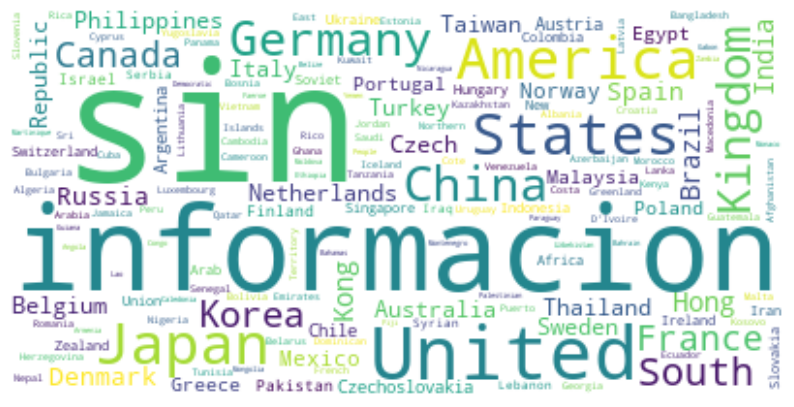

In [22]:
text1=" ".join(pa for pa in pais['Paises_Produccion'])
# Creo una nube de palabras
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text1)

# muestro la nube de palabras
plt.figure(figsize = (10,10))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

## show emitidos por año 

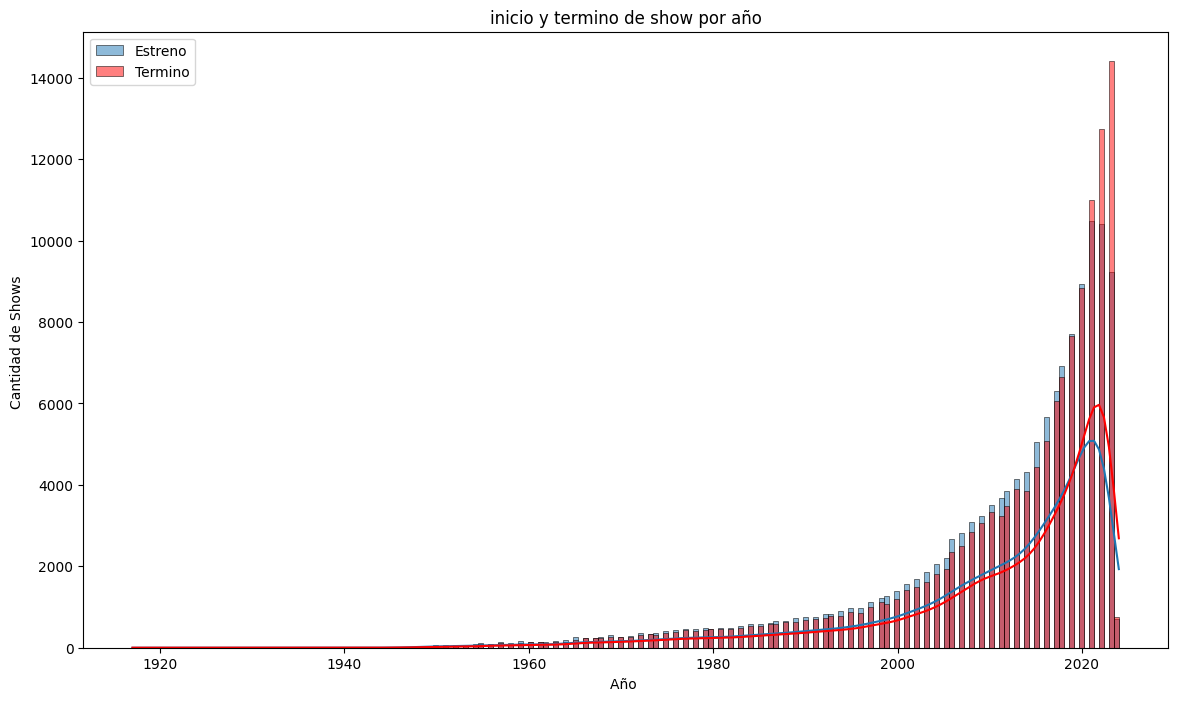

In [23]:
tmdb_fin=tmdb.copy()
tmdb_fin['Fecha_Fin']=pd.to_datetime(tmdb_fin['Fecha_Fin'])
tmdb_fin['año']=tmdb_fin['Fecha_Fin'].dt.year
tmdb_fin['mes']=tmdb_fin['Fecha_Fin'].dt.strftime('%b')
tmdb_fin['anhomes']=tmdb_fin['Fecha_Fin'].dt.to_period('M')
tmdb_inicio=tmdb.dropna(subset=['Fecha_Inicio'])
tmdb_inicio['Fecha_Inicio']=pd.to_datetime(tmdb_inicio['Fecha_Inicio'])
tmdb_inicio['año']=tmdb_inicio['Fecha_Inicio'].dt.year
tmdb_inicio['mes']=tmdb_inicio['Fecha_Inicio'].dt.strftime('%b')
tmdb_inicio['anhomes']=tmdb_inicio['Fecha_Inicio'].dt.to_period('M')

plt.figure(figsize=(14, 8))
sns.histplot(x='año', data=tmdb_inicio,label="Estreno", kde=True)
sns.histplot(x='año', data=tmdb_fin, color="red",label="Termino", kde=True)
plt.xlabel('Año ')
plt.ylabel('Cantidad de Shows ')
plt.title('inicio y termino de show por año')
plt.legend() 

plt.show()

Generos usados y popularidad

<Axes: xlabel='count', ylabel='Generos'>

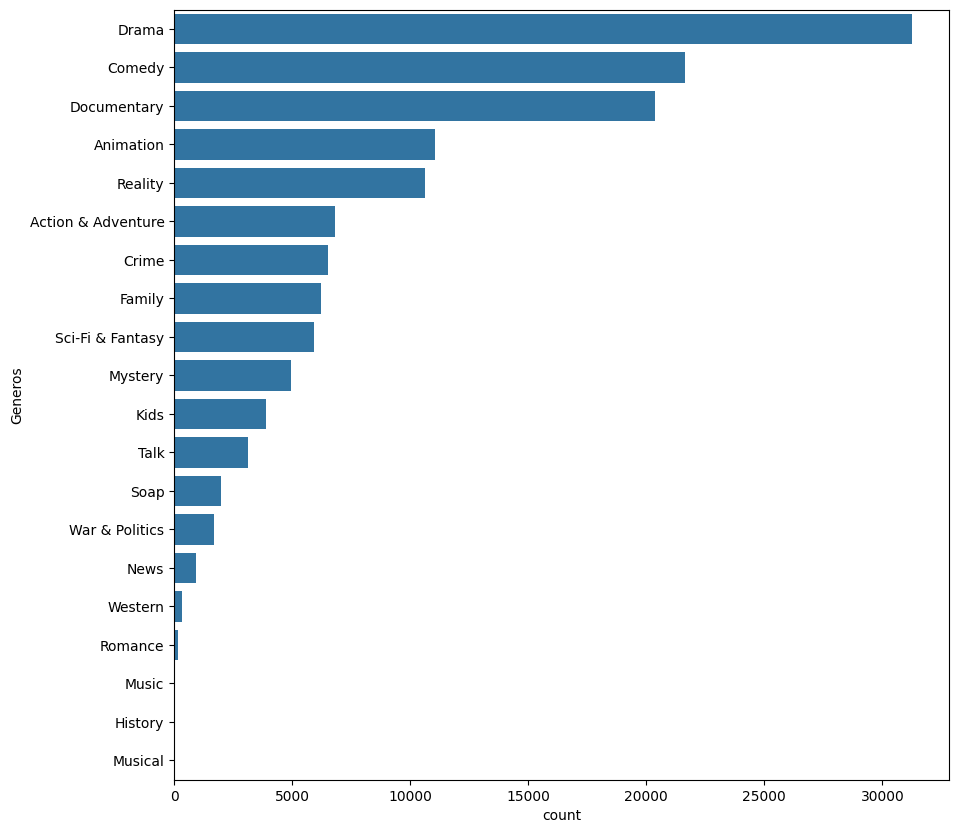

In [38]:
genero_con=genero.copy()

genero_con=genero_con[genero_con['Generos']!='sin informacion']
genero_con['Generos']=genero_con['Generos'].str.strip()
plt.figure(figsize=(10, 10))
sns.countplot(data=genero_con,y='Generos',order=genero_con['Generos'].value_counts().index)

<Axes: xlabel='anho_I'>

<Figure size 1000x1000 with 0 Axes>

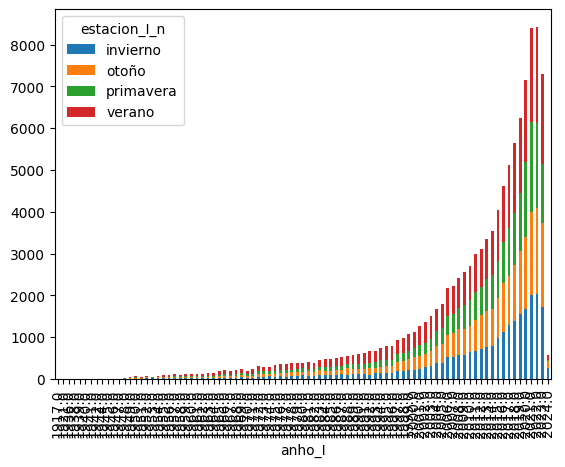

In [68]:
genero_fecha=genero_con.join(tmdb[['anho_I','anho_F','estacion_I_n','estacion_F_n']],lsuffix='_left')
df=genero_fecha.groupby(['anho_I','estacion_I_n']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 10))
df.plot(kind='bar', stacked=True)

<Axes: xlabel='anho_I'>

<Figure size 1000x1000 with 0 Axes>

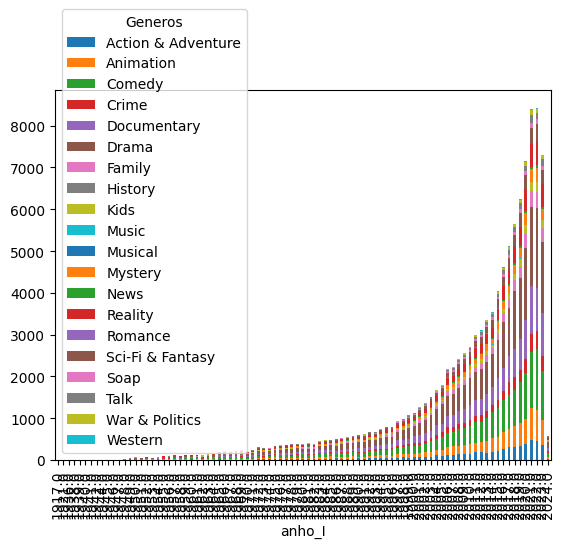

In [67]:
genero_fecha=genero_con.join(tmdb[['anho_I','anho_F','estacion_I_n','estacion_F_n']],lsuffix='_left')
df=genero_fecha.groupby(['anho_I','Generos']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 10))
df.plot(kind='bar', stacked=True)

<Axes: xlabel='Generos'>

<Figure size 1000x1000 with 0 Axes>

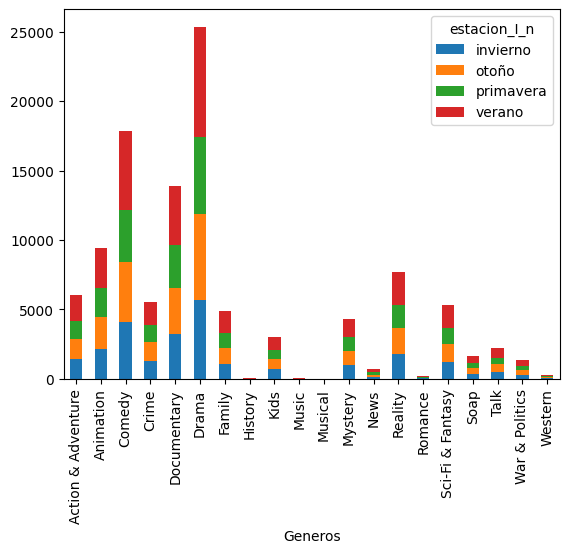

In [65]:
genero_fecha=genero_con.join(tmdb[['anho_I','anho_F','estacion_I_n','estacion_F_n']],lsuffix='_left')
df=genero_fecha.groupby(['Generos','estacion_I_n']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 10))
df.plot(kind='bar', stacked=True)


In [48]:
tmdb.index

RangeIndex(start=0, stop=135806, step=1)

## INSIGHT

1. Se observa una posible recesion en lo sshow emitidos, tras la finalizacion de la pandemia
2. no existe una relacion entre el momento que se emite un show y los generos usados
3.  